In [1]:
import requests
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import io   
import re
from datetime import datetime
import pytz
from lib_func import save_text_from_url
from lib_func import convert_utc_to_edt
from lib_func import convert_forecast_to_df
from lib_func import plot_forecast

#3-day forecast
url_forecast = 'https://services.swpc.noaa.gov/text/3-day-forecast.txt'

#File name
filename_forecast = 'solar_forecast.txt'

dates_txt_to_num = {    'Jan' : 1,
                        'Feb' : 2,
                        'Mar' : 3,
                        'Apr' : 4,
                        "May" : 5,
                        "Jun" : 6,
                        "Jul" : 7,
                        "Aug" : 8,
                        "Sep" : 9,
                        "Oct" : 10,
                        "Nov" : 11,
                        "Dec" : 12
                   }
time_zones = pytz.all_timezones

'''
def save_text_from_url(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"File saved as '{filename}'")
    else:
        print(f"Failed to download file from '{url}'")

def convert_utc_to_edt(time_str, date_str, t_zone = 'America/New_York' ):
    # Define UTC and EDT timezones
    utc_timezone = pytz.utc
    edt_timezone = pytz.timezone(t_zone)

    # Parse input time and date strings
    input_datetime = datetime.strptime(date_str + ' ' + time_str, '%Y-%m-%d %H:%M')

    # Localize the input datetime to UTC timezone
    input_datetime_utc = utc_timezone.localize(input_datetime)

    # Convert the datetime to Eastern Daylight Time (EDT)
    time_edt = input_datetime_utc.astimezone(edt_timezone)

    # Format the time as string in EDT
    time_edt_str = time_edt.strftime('%Y-%m-%d %H:%M %Z%z')

    return time_edt_str

def convert_forecast_to_df(filename_forecast, t_zone = 'America/New_York'):
    f = open(filename_forecast, 'r')
    data = f.read()
    data_lines = data.split('\n')
    dates = data_lines[13]
    dates_list = dates.lstrip().replace('  ', '').split(' ')
    forecast_data=[]
    #forecast_data = ['time date1 date2 date3']
    forecast_data.extend(data_lines[14:22])
    full_txt_data_forecast = ''
    full_txt_data_forecast_EDT = 'dateTime,value\n'
    current_year = dt.datetime.now().year

    i = 0
    for l in forecast_data:
        l = re.sub(r'(\s)\s*', r'\1', l)
        l = l.replace(' (', '(')
        line = l.split(' ')
        #print(l)
        t1 = l[:2]+':00'
        t2 = l[3:5]+':00'
        current_year = dt.datetime.now().year
        i = 0 #counter to make sure year is not updated twice
        mon = str(dates_txt_to_num[dates_list[0]])
        if mon == 1:
            i = 1  #If the first month is already Jan, no need to update the year
        curr_date = str(current_year) +"-" + mon + "-" + dates_list[1]
        
        mon = str(dates_txt_to_num[dates_list[2]])
        if( i == 0 and mon == 1 ): #If the second month is Jan, and first isn't, increase the year by 1
            current_year += 1
            i = 1
        next_date = str(current_year) +"-" + mon + "-" + dates_list[3]
            
        mon = str(dates_txt_to_num[dates_list[4]])
        if i == 0 and mon == 0:
            current_year += 1#If the third month is Jan, and first and second aren't, increase the year by 1
        day_after = str(current_year) +"-" + mon + "-" + dates_list[5]        

        time_1 = convert_utc_to_edt(t1, curr_date, t_zone)[:-9]
        time_2 = convert_utc_to_edt(t1, next_date, t_zone)[:-9]
        time_3 = convert_utc_to_edt(t1, day_after, t_zone)[:-9]
        
        full_txt_data_forecast_EDT += str(time_1) + ',' + line[1] + '\n'
        full_txt_data_forecast_EDT += str(time_2) + ',' + line[2] + '\n'
        full_txt_data_forecast_EDT += str(time_3) + ',' + line[3] + '\n'
        
        full_txt_data_forecast +=  curr_date + '\t' + l + "\n"

    forecast_df = pd.read_csv(io.StringIO(full_txt_data_forecast_EDT), sep = ',', parse_dates = ['dateTime'])
    forecast_df = forecast_df.sort_values('dateTime').reset_index()[['dateTime', 'value']]
    #forecast_df.set_index('dateTime', inplace = True)
    forecast_df['numeric_value'] = forecast_df['value'].str.extract(r'(\d+\.\d+)').astype(float)
    forecast_df['night'] = forecast_df.dateTime.apply( lambda row: row.hour <6 or row.hour >= 20 )
    #print(forecast_df)
    return forecast_df

def plot_forecast(forecast_df, t_zone = 'America/New_York', night_color = (18/255, 69/255, 89/255), 
                  day_color = (241/255, 135/255, 1/255), night_alpha = 1, day_alpha = 0.5):
    forecast_df = convert_forecast_to_df(filename_forecast, t_zone)
    df_night =forecast_df[['dateTime', 'numeric_value', 'night']]

    plt.figure(figsize=(10, 6))
    alphas = df_night['night'].map({True: night_alpha, False: day_alpha})
    colors = df_night['night'].map({True: night_color, False: day_color})
    bars = plt.bar(df_night['dateTime'].dt.strftime('%Y-%m-%d %H:%M:%S'), df_night['numeric_value'], color=colors)
    for bar, alpha in zip(bars, alphas):
        bar.set_alpha(alpha)

    plt.xlabel('DateTime')
    plt.ylabel('Numeric Value')
    plt.title('Bar Plot of Numeric Value with Night Indicator ' + t_zone)
    plt.xticks(rotation=45, ha='right')
    #plt.gca().set_facecolor((24/255, 52/255, 70/255))
    #plt.gca().set_facecolor((.5, .5, .5))
    plt.figure(facecolor='white')
    # Show plot
    plt.show()
'''

<>:35: SyntaxWarning: invalid escape sequence '\s'
<>:35: SyntaxWarning: invalid escape sequence '\s'
C:\Users\dviab\AppData\Local\Temp\ipykernel_36232\383790778.py:35: SyntaxWarning: invalid escape sequence '\s'
  '''


'\ndef save_text_from_url(url, filename):\n    response = requests.get(url)\n    if response.status_code == 200:\n        with open(filename, \'wb\') as file:\n            file.write(response.content)\n        print(f"File saved as \'{filename}\'")\n    else:\n        print(f"Failed to download file from \'{url}\'")\n\ndef convert_utc_to_edt(time_str, date_str, t_zone = \'America/New_York\' ):\n    # Define UTC and EDT timezones\n    utc_timezone = pytz.utc\n    edt_timezone = pytz.timezone(t_zone)\n\n    # Parse input time and date strings\n    input_datetime = datetime.strptime(date_str + \' \' + time_str, \'%Y-%m-%d %H:%M\')\n\n    # Localize the input datetime to UTC timezone\n    input_datetime_utc = utc_timezone.localize(input_datetime)\n\n    # Convert the datetime to Eastern Daylight Time (EDT)\n    time_edt = input_datetime_utc.astimezone(edt_timezone)\n\n    # Format the time as string in EDT\n    time_edt_str = time_edt.strftime(\'%Y-%m-%d %H:%M %Z%z\')\n\n    return time_ed

In [2]:
save_text_from_url(url_forecast, filename_forecast)

File saved as 'solar_forecast.txt'


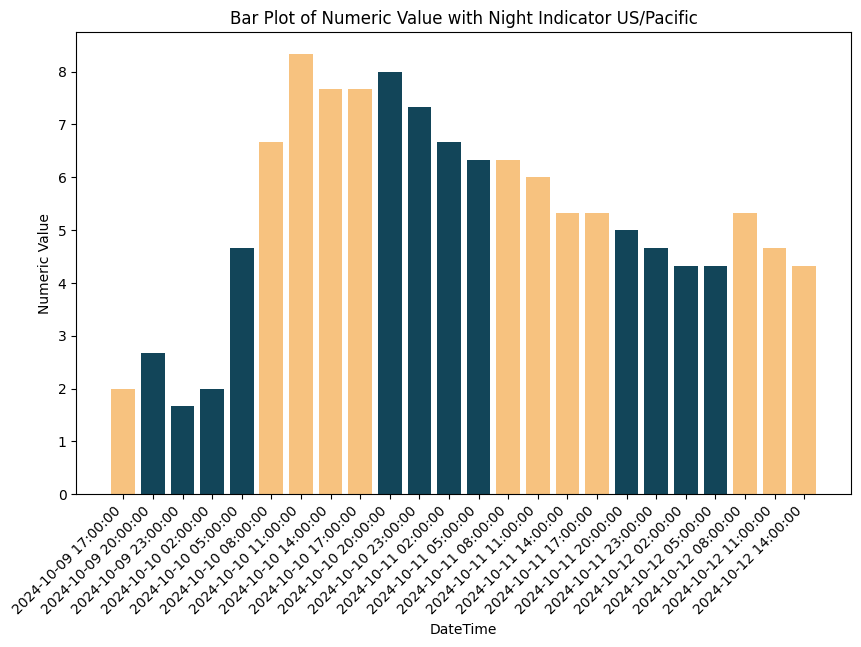

<Figure size 640x480 with 0 Axes>

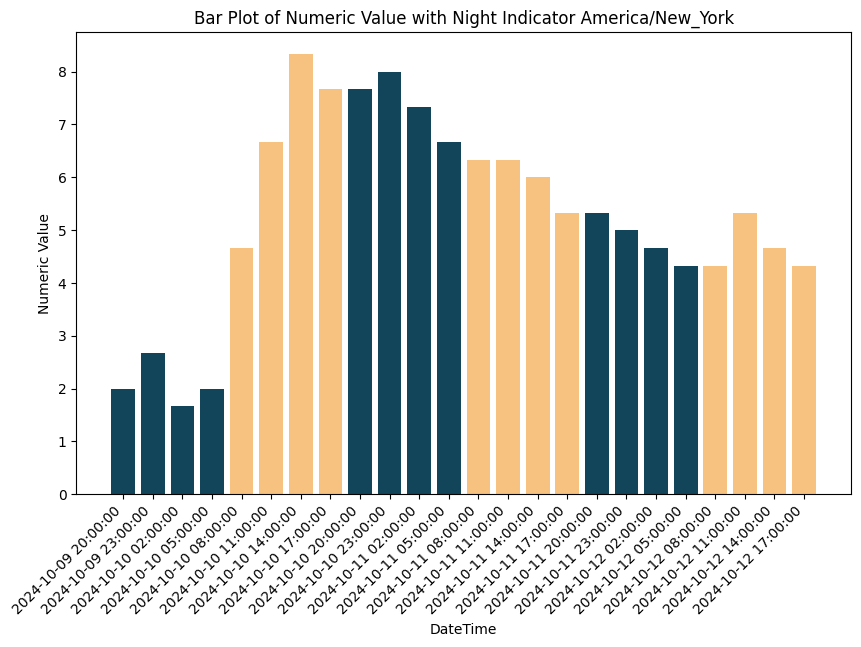

<Figure size 640x480 with 0 Axes>

In [3]:
#t_zone = 'America/New_York'
forecast_df = convert_forecast_to_df(filename_forecast, 'US/Pacific')
plot_forecast(forecast_df, 'US/Pacific' )
forecast_df = convert_forecast_to_df(filename_forecast)
plot_forecast(forecast_df )